In [1]:
from fastai.vision.all import *
from models.GAN import Generator, Critic, GANLearner
from fastai.vision.gan import generate_noise
from torchsummary import summary
from util.util import GANImageBlock

In [2]:
path = Path('data/celebA/img_align_celeba/img_align_celeba')

In [3]:
Path.BASE_PATH = path

In [4]:
datablock = DataBlock(blocks=(TransformBlock, GANImageBlock),
                      get_items=get_image_files,
                      get_x=generate_noise,
                      splitter=RandomSplitter(seed=42),
                      item_tfms=Resize(64)
                     )

In [5]:
dataloaders = datablock.dataloaders(path, bs=64)

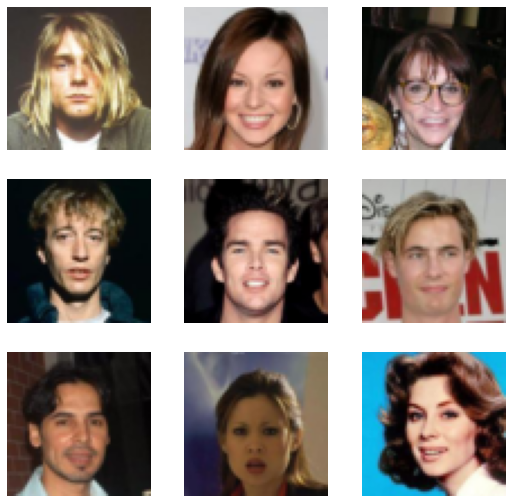

In [6]:
dataloaders.show_batch(max_n=9)

In [7]:
generator = Generator(z_dim=100,
                      unflattened_shape=[512, 4, 4],
                      upsample_scale=[2, 2, 2, 2],
                      filters=[256, 128, 64, 3],
                      kernels=[5, 5, 5, 5],
                      strides=[1, 1, 1, 1],
                      batch_norm_mom=0.9,
                      dropout_prob=None
                     )

In [ ]:
summary(generator, (100,))

In [8]:
critic = Critic(input_shape=[3, 64, 64],
                filters=[64, 128, 256, 512],
                kernels=[5, 5, 5, 5],
                strides=[2, 2, 2, 2],
                batch_norm_mom=None,
                dropout_prob=None
               )

In [ ]:
summary(critic, (3, 64, 64))

In [9]:
learner = GANLearner.wgangp(dataloaders=dataloaders,
                            generator=generator,
                            critic=critic,
                            opt_func=Adam
                           )

learner.recorder.train_metrics=True
learner.recorder.valid_metrics=False

In [10]:
learner.fit(30, 1e-4)

epoch,train_loss,genr8r_loss,critic_loss,time
0,-16.830980,-4.113370,-29.189167,05:39
1,-4.365926,-4.964234,-17.276968,05:35
2,-8.630874,14.832973,-14.014806,05:44
3,-7.464493,21.678469,-10.422512,05:41
4,4.413992,19.944765,-9.545536,05:42
5,-26.636358,20.125538,-8.181265,05:34
6,-5.123385,4.644857,-6.917906,05:40
7,-12.205104,6.033422,-6.804203,06:18
8,-6.338228,10.555538,-6.151996,06:21
9,-7.811562,-4.050459,-6.052771,05:53


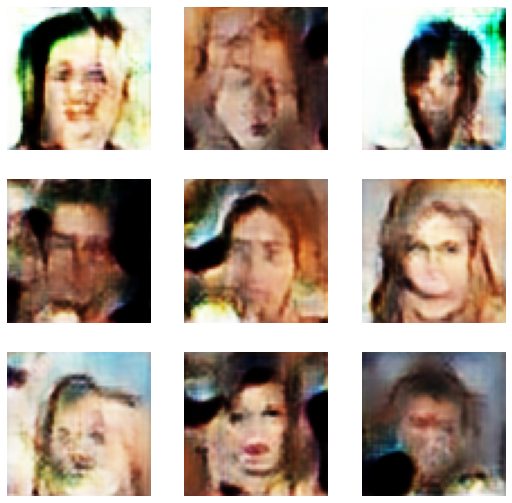

In [12]:
learner.show_results(max_n=9, ds_idx=0)